<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/Models/MP_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Fraud Detection using AdaBoost Classifier

[AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path= '/content/gdrive/MyDrive/Mini_Project_2023/increased_transaction_dataset.csv'
dft= pd.read_csv(path)
dft.sample(5)

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
18342,18342,Non - Fraud,254.61,479.990875,244293.766416,9,6,0,119.244302,36.343266,4.729060,1241.757210,500.761418,5.698117e+06,1.903444e+06,11.486954,1.0,1.0,187,410
5384,5384,Non - Fraud,0.00,0.000000,8.000000,1,1,0,0.306748,0.306748,0.306244,0.306244,0.000504,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,4,3
6849,6849,Non - Fraud,0.00,28836.340000,259527.030000,0,9,1,3.360644,1.397789,0.000000,0.000000,12.580099,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,4,3
8293,8293,Non - Fraud,5.03,0.000000,15.080000,3,2,0,1182.560170,1000.500000,666.999528,2000.998585,0.001415,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,4,3
6254,6254,Non - Fraud,0.00,6265.280000,338325.370000,0,54,1,1.007072,0.684021,0.000000,0.000000,36.937148,1.770171e+00,0.000000e+00,0.000000,0.0,3.0,185,309


In [ ]:
dft['FLAG']= dft['FLAG'].replace('Fraud', 1)
dft['FLAG']= dft['FLAG'].replace('Non - Fraud', 0)

dft['FLAG'].value_counts()

0    15299
1     4383
Name: FLAG, dtype: int64

In [ ]:
X= dft[['Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'total Ether sent',
       'total ether balance', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec token name',
       ' ERC20 most sent token type', ' ERC20_most_rec_token_type']]

y= dft[['FLAG']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

**AdaBoost without Cost Sensitive Learning**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

abc1 = AdaBoostClassifier()
abc1.fit(x_train, y_train)
y_pred1= abc1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4559
           1       0.97      0.94      0.96      1346

    accuracy                           0.98      5905
   macro avg       0.98      0.97      0.97      5905
weighted avg       0.98      0.98      0.98      5905



In [ ]:
from sklearn import metrics
cm1= metrics.confusion_matrix(y_test, y_pred1)
cm1

array([[4516,   43],
       [  76, 1270]])

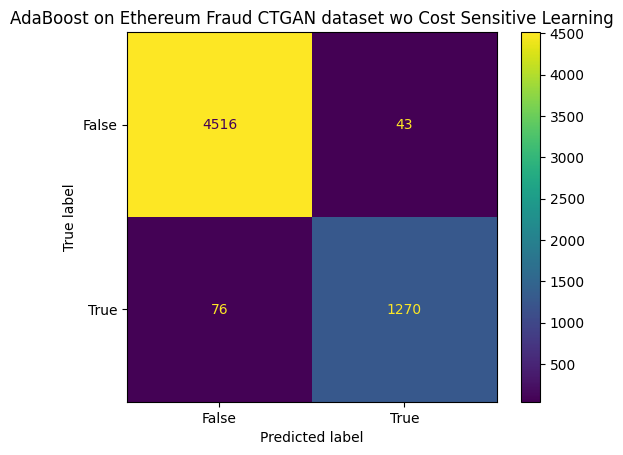

In [ ]:
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels= [False, True])

display_cm.plot()
plt.title('AdaBoost on Ethereum Fraud CTGAN dataset wo Cost Sensitive Learning')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score					
					
print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred1)))					
print('XGBoost Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred1)))					
print('XGBoost Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred1)))					

XGBoost Model accuracy score: 0.9798
XGBoost Model precision score: 0.9673
XGBoost Model recall score: 0.9435


**AdaBoost with Cost Sensitive Learning of 3**

In [ ]:
balancing_factor= y.value_counts()[0] // y.value_counts()[1]
print(balancing_factor)

3


In [ ]:
# Calculate the class weights
class_weight = {0: 1, 1: balancing_factor} # Set the weight of class 1 to 3

# Create the sample weight vector
sample_weight_train = [class_weight[y_train.iloc[i, 0]] for i in range(len(y_train))]

In [ ]:
sample_weight_test= [class_weight[y_test.iloc[i, 0]] for i in range(len(y_test))]

In [ ]:
abc2 = AdaBoostClassifier()
abc2.fit(x_train, y_train, sample_weight= sample_weight_train)
y_pred2= abc2.predict(x_test)
print(classification_report(y_test, y_pred2, sample_weight= sample_weight_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    4559.0
           1       0.98      0.96      0.97    4038.0

    accuracy                           0.97    8597.0
   macro avg       0.97      0.97      0.97    8597.0
weighted avg       0.97      0.97      0.97    8597.0



In [ ]:
cm2= metrics.confusion_matrix(y_test, y_pred2)
cm2

array([[4479,   80],
       [  56, 1290]])

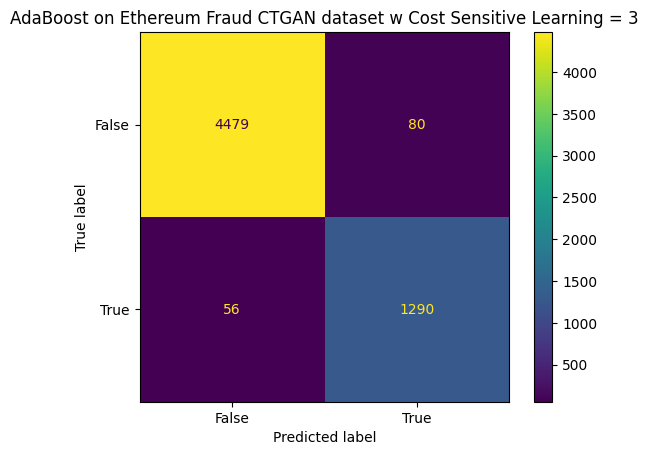

In [ ]:
display_cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels= [False, True])

display_cm2.plot()
plt.title('AdaBoost on Ethereum Fraud CTGAN dataset w Cost Sensitive Learning = 3')

In [ ]:
print('Cost Sensitive XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))							
print('Cost Sensitive XGBoost Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred2)))							
print('Cost Sensitive XGBoost Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred2)))							

Cost Sensitive XGBoost Model accuracy score: 0.9770
Cost Sensitive XGBoost Model precision score: 0.9416
Cost Sensitive XGBoost Model recall score: 0.9584


<hr>

In [ ]:
# # Splitting the dataset
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

# # Calculating the balancing factor for Cost Sensitive Learning
# balancing_factor= y.value_counts()[0] // y.value_counts()[1]

# # Calculate the class weights
# class_weight = {0: 1, 1: balancing_factor} # Set the weight of class 1 to 3

# # Create the sample weight vector
# sample_weight_train = [class_weight[y_train.iloc[i, 0]] for i in range(len(y_train))]
# sample_weight_test= [class_weight[y_test.iloc[i, 0]] for i in range(len(y_test))]

# # Apply Cost Sensitive Learning to the model
# from sklearn.ensemble import AdaBoostClassifier
# abc2 = AdaBoostClassifier()
# abc2.fit(x_train, y_train, sample_weight= sample_weight_train)
# y_pred2= abc2.predict(x_test)